In [225]:
#CLASSIFICATION
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#dataset okuma ve Veri hazırlık
df=pd.read_csv("heart111.csv",sep=";")
print(df.info())
print("")
print(df.dtypes) 
print("")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  target    920 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.4+ KB
None

id            int64
age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
target        int64
dtype: object

   id  age     sex       

In [226]:
df.drop("id",inplace=True,axis=1) 

print(df.cp.unique()) 
print(df.restecg.unique())
print(df.sex.unique())
print(df.fbs.unique())
print(df.exang.unique())

print("")

print(df.isnull().sum()) 

['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
['Male' 'Female']
[True False nan]
[False True nan]

age          0
sex          0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
target       0
dtype: int64


In [227]:
df["trestbps"].fillna((df["trestbps"].mean()),inplace=True)
df["chol"].fillna((df["chol"].mean()),inplace=True)
df["restecg"].fillna("normal",inplace=True)
df["thalch"].fillna((df["thalch"].mean()),inplace=True)


In [228]:
df.dropna(inplace=True)
print(df.isnull().sum().sum())
prınt("")
print(df)

0
     age     sex               cp  trestbps   chol    fbs           restecg  \
0     63    Male   typical angina     145.0  233.0   True    lv hypertrophy   
1     67    Male     asymptomatic     160.0  286.0  False    lv hypertrophy   
2     67    Male     asymptomatic     120.0  229.0  False    lv hypertrophy   
3     37    Male      non-anginal     130.0  250.0  False            normal   
4     41  Female  atypical angina     130.0  204.0  False    lv hypertrophy   
..   ...     ...              ...       ...    ...    ...               ...   
913   62    Male     asymptomatic     158.0  170.0  False  st-t abnormality   
914   46    Male     asymptomatic     134.0  310.0  False            normal   
915   54  Female     asymptomatic     127.0  333.0   True  st-t abnormality   
917   55    Male     asymptomatic     122.0  223.0   True  st-t abnormality   
919   62    Male  atypical angina     120.0  254.0  False    lv hypertrophy   

     thalch  exang  oldpeak  target  
0     150.0

In [229]:
print(df.dtypes) 

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
target        int64
dtype: object


In [230]:
df.sex=[1 if i =="Male" else 0 for i in df.sex]
df=pd.get_dummies(df,columns=["fbs"])
df=pd.get_dummies(df,columns=["exang"])
df=pd.get_dummies(df,columns=["cp"])
df=pd.get_dummies(df,columns=["restecg"])

In [231]:
print(df.info())
print("")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 919
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       771 non-null    int64  
 1   sex                       771 non-null    int64  
 2   trestbps                  771 non-null    float64
 3   chol                      771 non-null    float64
 4   thalch                    771 non-null    float64
 5   oldpeak                   771 non-null    float64
 6   target                    771 non-null    int64  
 7   fbs_False                 771 non-null    uint8  
 8   fbs_True                  771 non-null    uint8  
 9   exang_False               771 non-null    uint8  
 10  exang_True                771 non-null    uint8  
 11  cp_asymptomatic           771 non-null    uint8  
 12  cp_atypical angina        771 non-null    uint8  
 13  cp_non-anginal            771 non-null    uint8  
 14  cp_typical

In [232]:
donusum = {"age": int, 
           "sex": int,
           "trestbps":int,
           "chol":int,
           "fbs_False":int,
           "fbs_True":int,
           "thalch":int,
           "oldpeak":int,
          "exang_False":int,
           "exang_True":int,
           "target":int,
           "cp_asymptomatic":int,
           "cp_atypical angina":int,
           "cp_non-anginal":int,
           "cp_typical angina":int,
           "restecg_lv hypertrophy":int,
           "restecg_normal":int,
           "restecg_st-t abnormality":int} 
df=df.astype(donusum)

In [233]:
df.reset_index(inplace=True,drop=True)#restleme

print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
766    False
767    False
768    False
769    False
770    False
Length: 771, dtype: bool


In [250]:
y=df.target.values
x_data=df.drop(["target"],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
#x=x_data

x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)


knn score: 0.5905172413793104


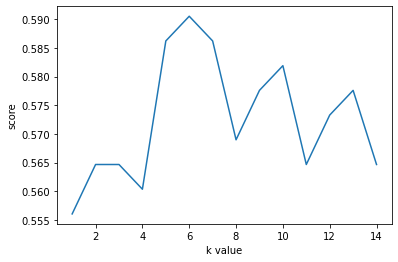

svm score: 0.5818965517241379
dt score: 0.5172413793103449
rf score: 0.6120689655172413


In [251]:
#Knn

knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train.ravel())
knn_pred=knn.predict(x_test)
print("knn score:",knn.score(x_test,y_test)) 

score_list=[]
for i in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train.ravel())
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k value")
plt.ylabel("score")
plt.show()


#SVM

svm=SVC(random_state=1)
svm.fit(x_train,y_train.ravel())
svm_pred=svm.predict(x_test)
print("svm score:",svm.score(x_test,y_test))


#Decision tree

dt1=DecisionTreeClassifier(random_state=1)
dt1.fit(x_train,y_train)
dt1_pred=dt1.predict(x_test)
print("dt score:",dt1.score(x_test,y_test))


#Random forest

rf1=RandomForestClassifier(n_estimators=200, random_state=1)
rf1.fit(x_train,y_train.ravel())
rf1_pred=rf1.predict(x_test)
print("rf score:",rf1.score(x_test,y_test))


In [252]:
#classification degerlendirme
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,matthews_corrcoef


#accuracy score,matthews corrcoef and confusion matrix
print("knn:","accuracy score:",accuracy_score(y_test,knn_pred),"confusion matrix:",confusion_matrix(y_test,knn_pred),"matthews corrcoef:",matthews_corrcoef(y_test,knn_pred))
print("")
print("svm:","accuracy score:",accuracy_score(y_test,svm_pred),"confusion matrix:",confusion_matrix(y_test,svm_pred),"matthews corrcoef:",matthews_corrcoef(y_test,svm_pred))
print("")
print("dt1:","accuracy score:",accuracy_score(y_test,dt1_pred),"confusion matrix:",confusion_matrix(y_test,dt1_pred),"matthews corrcoef:",matthews_corrcoef(y_test,dt1_pred))
print("")
print("rf1:","accuracy score:",accuracy_score(y_test,rf1_pred),"confusion matrix:",confusion_matrix(y_test,rf1_pred),"matthews corrcoef:",matthews_corrcoef(y_test,rf1_pred))

knn: accuracy score: 0.5905172413793104 confusion matrix: [[98 14  2  1  0]
 [21 31  1  3  0]
 [ 9 13  4  1  0]
 [ 7  9  5  4  0]
 [ 1  5  1  2  0]] matthews corrcoef: 0.3502252634658884

svm: accuracy score: 0.5818965517241379 confusion matrix: [[103  12   0   0   0]
 [ 24  32   0   0   0]
 [  8  19   0   0   0]
 [  9  16   0   0   0]
 [  3   6   0   0   0]] matthews corrcoef: 0.3217726098458342

dt1: accuracy score: 0.5172413793103449 confusion matrix: [[84 16  6  7  2]
 [13 24 11  6  2]
 [ 6  8  6  7  0]
 [ 7  5  4  5  4]
 [ 2  3  1  2  1]] matthews corrcoef: 0.28417059503394404

rf1: accuracy score: 0.6120689655172413 confusion matrix: [[99 13  1  2  0]
 [20 29  3  4  0]
 [ 3 13  6  4  1]
 [ 6  6  4  8  1]
 [ 1  4  2  2  0]] matthews corrcoef: 0.39631150111144287
